<a href="https://colab.research.google.com/github/RoisulIslamRumi/MNIST-PyTorch/blob/main/MNIST_custom_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   List item
2.   List item



# Step 1: Load the MNIST dataset

In [30]:
import torch
import torchvision.datasets as ds
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms import ToTensor
from torchsummary import summary

In [31]:
train = ds.MNIST(root='./data', train=True, download=True, transform=ToTensor())
test = ds.MNIST(root='./data', train=False, download=True,transform=ToTensor())




In [32]:
print(train.data.size())
print(test.data.size())
print("Label size", train.targets.size())

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
Label size torch.Size([60000])


# Step 2: Make the dataset iterable

In [33]:
#Load Dataset into Dataloader
batch_size = 60
n_iters = len(train)/batch_size
print("Number of iterations:", n_iters)
num_epochs = 5

train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=batch_size, shuffle=True)

test_loader =torch.utils.data.DataLoader(dataset=test, batch_size=batch_size, shuffle=False)

Number of iterations: 1000.0


In [34]:
#define the class and initialize with all the layers
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()

        #conv1
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=2)
        self.relu1 = nn.PReLU()
        #Maxpool1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        #conv2
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.PReLU()
        #Maxpool2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        #FC layer           #calculated using output formula for conv and pool
                        #channel h *w
        self.fc1 = nn.Linear(32 * 7 * 7, 10)
        #forward pass

    def forward(self, x):
        
        #conv1
        out = self.conv1(x)
        out = self.relu1(out)

        #Maxpool1
        out = self.maxpool1(out)
       
        #conv2
        out = self.conv2(out)
        out = self.relu2(out)

        #maxpool2
        out = self.maxpool2(out)
        
        out = out.view(out.size(0), -1)
        
        #Linear function
        out = self.fc1(out)

        return out



# Step 4: Instantialte Model Class

In [35]:
model = CustomCNN()
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = CustomCNN().to(device)
# summary(model, (1,28,28))

# Step 5: Instantialte Loss Class


*   Feedforward Neural Network: Cross Entropy Loss
*   Logistic Regression: Cross Entropy Loss
* Linear Regression: MSE



In [36]:
#cross entropy loss
criterion = nn.CrossEntropyLoss()

# Step 6: Instantialte Optimizer Class

In [37]:
#optimizer
lr = 0.01
optimizer = optim.SGD(model.parameters(), lr=lr)

In [38]:
print(model.parameters())

print(len(list(model.parameters())))

# Convolution 1: 16 Kernels
print(list(model.parameters())[0].size())

# Convolution 1 Bias: 16 Kernels
print(list(model.parameters())[1].size())

# Convolution 2: 32 Kernels with depth = 16
print(list(model.parameters())[2].size())

# Convolution 2 Bias: 32 Kernels with depth = 16
print(list(model.parameters())[3].size())

# Fully Connected Layer 1
print(list(model.parameters())[4].size())

# Fully Connected Layer Bias
print(list(model.parameters())[5].size())

<generator object Module.parameters at 0x7fc468aaee50>
8
torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([1])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([1])


#Step 7: Train the Model

In [39]:
iter = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        #load images
        images = images.requires_grad_()

        #clear grads w.r.t. params
        optimizer.zero_grad()

        #Forward pass to get output/logits
        outputs = model(images)

        #calculate loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        #back pass
        loss.backward()
        
        #update param
        optimizer.step()

        iter += 1
        
        if iter % 50 == 0:
            #calc accuracy
            correct = 0
            total = 0
            #iterate test data
            for images,labels in test_loader:
                images = images.requires_grad_()
                outputs = model(images)
                #get predictions from the max val
                _, predicted = torch.max(outputs.data, 1)

                #total labels
                total += labels.size(0)

                #total correct predictions
                correct += (predicted == labels).sum()
            
            acc = 100 * (correct / total)
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(iter)
            accuracy_list.append(acc)
        if iter % 500 == 0:
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), acc))



Iteration: 500. Loss: 0.4334978461265564. Accuracy: 89.70000457763672
Iteration: 1000. Loss: 0.21752119064331055. Accuracy: 92.87999725341797
Iteration: 1500. Loss: 0.41986900568008423. Accuracy: 94.45999908447266
Iteration: 2000. Loss: 0.1281280815601349. Accuracy: 95.67000579833984
Iteration: 2500. Loss: 0.11578966677188873. Accuracy: 96.3800048828125
Iteration: 3000. Loss: 0.17927679419517517. Accuracy: 96.83999633789062
Iteration: 3500. Loss: 0.04082271084189415. Accuracy: 97.0999984741211
Iteration: 4000. Loss: 0.028964316472411156. Accuracy: 97.22000122070312
Iteration: 4500. Loss: 0.01623312197625637. Accuracy: 97.27999877929688
Iteration: 5000. Loss: 0.2805522680282593. Accuracy: 97.69999694824219


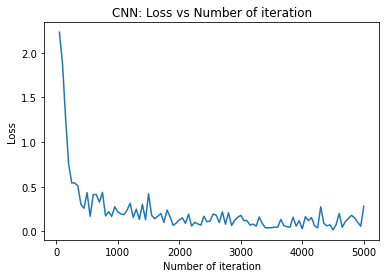

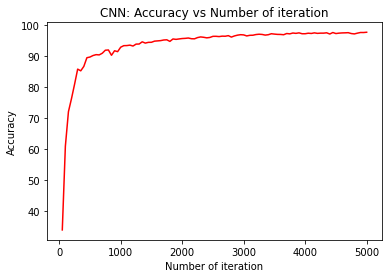

In [40]:
import matplotlib.pyplot as plt
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()